In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
votes = pd.DataFrame.from_csv('AnsVotes_TSeries.csv', index_col=None)
votes.head()

,QuestionId,AnsId,Age_vot,AnsWordCount,AcceptedAnsId,QScore,QVotes,Score,Votes,Upvotes,...,CumScore,ReScore,QReScore,Comments,AnsRank,ReScore_rank,Ans_count,Pbias,DRank,EPbias
0,1,56,0,201,56,0,0,2,2,2,...,0,0,0,0,1,1,1,1,0,1
1,2,10,0,145,10,0,0,3,3,3,...,0,0,0,0,1,1,1,1,0,1
2,2,10,0,145,10,0,0,3,3,3,...,0,0,0,0,1,1,1,1,0,1
3,3,9,0,25,109,0,0,4,4,4,...,0,0,0,0,1,1,1,1,0,1
4,7,16,0,45,2977,0,0,3,3,3,...,0,0,0,0,1,1,1,1,0,1


In [3]:
users = pd.DataFrame.from_csv('user_reputation_votes.csv', index_col=None)
users.head()

,AnsId,QContributed,AnsContributed,ScoreRcvQ,VotRcvQ,ScoreRcvAns,VotRcvAns,Age
0,1,1,0,1,1,0,0,0
1,55,0,1,0,0,1,1,0
2,55,0,1,0,0,2,2,0
3,55,0,1,0,0,3,3,0
4,55,0,1,0,0,4,4,0


In [16]:
votes.columns

Index([u'QuestionId', u'AnsId', u'Age_vot', u'AnsWordCount', u'AcceptedAnsId',
       u'QScore', u'QVotes', u'Score', u'Votes', u'Upvotes', u'Downvotes',
       u'CumVotes', u'CumScore', u'ReScore', u'QReScore', u'Comments',
       u'AnsRank', u'ReScore_rank', u'Ans_count', u'Pbias', u'DRank',
       u'EPbias'],
      dtype='object')

In [4]:
#There can be posts/votes with deleted users, we avoid them here
m_votes = pd.merge(users, votes, how='inner', on=['AnsId'],suffixes=['_vot', '_user'])

get_head = lambda df: pd.DataFrame(dict(zip(df.iloc[0].index,[[e] for e in df.iloc[0].values])))
ff = lambda df: get_head(df.sort_values(by=["Age"],ascending=False))
votes_complete = m_votes[m_votes.Age_vot>=m_votes.Age].groupby(['AnsId','Age_vot']).apply(ff).reset_index(drop=True)
votes_complete.head()

,AcceptedAnsId,Age,Age_vot,AnsContributed,AnsId,AnsRank,AnsWordCount,Ans_count,Comments,CumScore,...,QuestionId,ReScore,ReScore_rank,Score,ScoreRcvAns,ScoreRcvQ,Upvotes,VotRcvAns,VotRcvQ,Votes
0,56,0,0,5,4,2,190,2,0,0,...,1,0.00,2,1,12,0,2,14,0,3
1,56,1436,1436,7,4,3,190,6,2,1,...,1,0.25,5,1,49,11,1,55,11,1
2,56,0,0,1,5,3,37,3,0,0,...,1,0.00,3,1,1,0,1,1,0,1
3,56,108,108,2,5,5,37,5,1,1,...,1,0.50,3,-1,-2,0,0,4,0,1
4,10,0,0,1,6,5,51,5,0,0,...,2,0.00,5,1,1,0,1,1,0,1


In [5]:
votes_complete.columns

Index([u'AcceptedAnsId', u'Age', u'Age_vot', u'AnsContributed', u'AnsId',
       u'AnsRank', u'AnsWordCount', u'Ans_count', u'Comments', u'CumScore',
       u'CumVotes', u'DRank', u'Downvotes', u'EPbias', u'Pbias',
       u'QContributed', u'QReScore', u'QScore', u'QVotes', u'QuestionId',
       u'ReScore', u'ReScore_rank', u'Score', u'ScoreRcvAns', u'ScoreRcvQ',
       u'Upvotes', u'VotRcvAns', u'VotRcvQ', u'Votes'],
      dtype='object')

In [34]:
#Age: age of vote on user post
#votes_complete.to_csv(path_or_buf='votes_ans_complete.csv')

In [5]:
votes_complete[['Age_vot','Ans_count','AnsWordCount','Comments']].describe()

,Age_vot,Ans_count,AnsWordCount,Comments
count,15159.000000,15159.000000,15159.000000,15159.000000
mean,182.389604,2.501418,126.575368,1.222772
std,355.905957,1.707417,129.736440,2.032405
min,0.000000,1.000000,3.000000,0.000000
25%,1.000000,1.000000,46.000000,0.000000
50%,5.000000,2.000000,89.000000,0.000000
75%,131.500000,3.000000,160.000000,2.000000
max,1504.000000,12.000000,2142.000000,18.000000


In [20]:
votes_complete[['ScoreRcvQ','VotRcvQ','ScoreRcvAns','VotRcvAns']].describe()

,ScoreRcvQ,VotRcvQ,ScoreRcvAns,VotRcvAns
count,15159.000000,15159.000000,15159.00000,15159.000000
mean,23.224553,23.840425,114.21855,118.612375
std,85.785722,87.881195,181.81826,186.426627
min,-1.000000,0.000000,-7.00000,1.000000
25%,0.000000,0.000000,9.00000,10.000000
50%,0.000000,0.000000,43.00000,46.000000
75%,12.000000,12.000000,144.00000,151.000000
max,1025.000000,1061.000000,1194.00000,1232.000000


In [23]:
votes_complete[['ReScore','QReScore','Pbias','EPbias']].describe()

,ReScore,QReScore,Pbias,EPbias
count,15159.000000,15159.000000,15159.000000,15159.000000
mean,0.450750,0.636234,0.756411,0.580921
std,0.388616,0.339490,0.299720,0.309246
min,-0.857143,-0.875000,0.090909,0.005837
25%,0.000000,0.500000,0.500000,0.330017
50%,0.500000,0.800000,1.000000,0.496412
75%,0.800000,0.875000,1.000000,1.000000
max,0.981132,0.979592,1.000000,1.000000


## Making Groups

In [6]:
from functools import partial

votes_complete['Reputation'] = votes_complete['VotRcvQ'] + votes_complete['VotRcvAns']
qtls_age = votes_complete['Age_vot'].quantile([0,.25,.5,.75,1.0]).values
age_groups = dict(zip(zip(qtls_age,qtls_age[1:]),[e for e in range(len(zip(qtls_age,qtls_age[1:])))]))

qtls_rep = votes_complete['Reputation'].quantile([0,.25,.5,.75,1.0]).values
rep_groups = dict(zip(zip(qtls_rep,qtls_rep[1:]),[e for e in range(len(zip(qtls_rep,qtls_rep[1:])))]))

def get_group(intervals,pred):
    for l,u in intervals:
        if l<=pred and pred<=u:
            return intervals[(l,u)]
get_age_group = partial(get_group,age_groups)
get_rep_group = partial(get_group,rep_groups)

In [7]:
votes_complete['Age_group'] = votes_complete['Age_vot'].apply(get_age_group)
votes_complete['Rep_group'] = votes_complete['Reputation'].apply(get_rep_group)
votes_r = votes_complete

In [141]:
rev_age_groups = {age_groups[(d1,d2)]:"%d to %d days"%(d1,d2) for d1,d2 in age_groups}

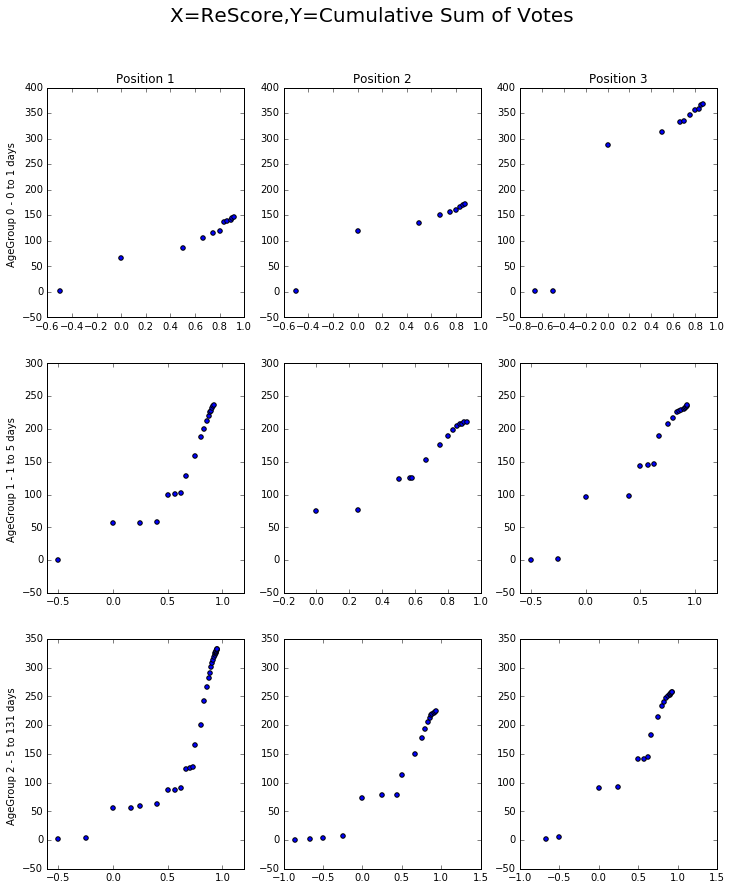

In [145]:
plt.figure(figsize=(12,14))
axref={}
nb_age_groups = 3
nb_ans = 3
groups = votes_complete[(votes_complete['Ans_count']==nb_ans)&(votes_complete['Age_group']<=nb_age_groups-1)]
groups = groups.sort_values(by=['Age_group']).groupby(['AnsRank','Age_group'])
for key,group in groups:
    position = group['AnsRank'].iloc[0]
    age_group = group['Age_group'].iloc[0]
    if position==1:
        axref[age_group] = plt.subplot(nb_age_groups, nb_ans,nb_ans*age_group + position)
    plt.subplot(nb_age_groups, nb_ans, nb_ans*age_group + position,sharey=axref[age_group])
    cumvotes = group.groupby(['ReScore']).sum()['Votes'].cumsum()
    plt.scatter(x = cumvotes.index.values,y=cumvotes.values)
    if age_group==0:
        plt.title('Position %d'%(position))
    if position==1:    
        plt.ylabel('AgeGroup %d - %s '%(age_group,rev_age_groups[age_group]))
        
plt.suptitle('X=ReScore,Y=Cumulative Sum of Votes',fontsize=20)
plt.show()

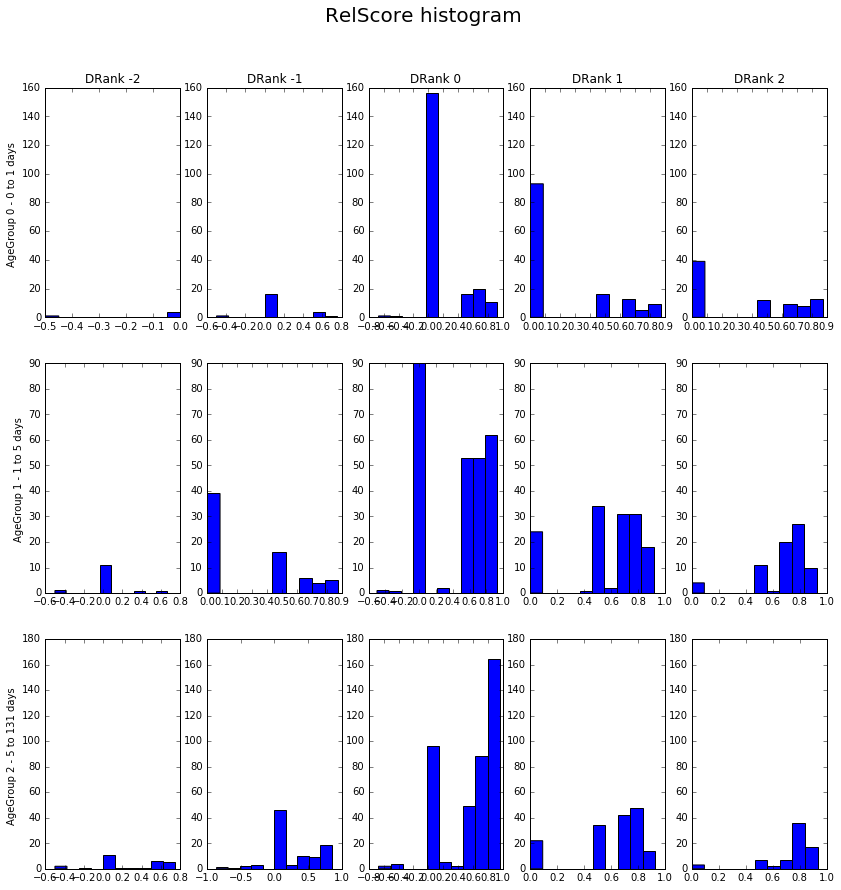

In [147]:
plt.figure(figsize=(14,14))
axref={}
nb_age_groups = 3
nb_ans = 3
nb_dranks = 2*(nb_ans-1)+1
groups = votes_complete[(votes_complete['Ans_count']==nb_ans)&(votes_complete['Age_group']<=nb_age_groups-1)]
groups = groups.sort_values(by=['Age_group']).groupby(['DRank','Age_group'])

for key,group in groups:
    drank = group['DRank'].iloc[0]
    age_group = group['Age_group'].iloc[0]
    position = nb_ans + drank
    if position==1:
        axref[age_group] = plt.subplot(nb_age_groups, nb_dranks,nb_dranks*age_group + position)
    plt.subplot(nb_age_groups, nb_dranks, nb_dranks*age_group + position,sharey=axref[age_group])
    plt.hist(group['ReScore'].values)
    if age_group==0:
        plt.title('DRank %d'%(drank))
    if position==1:    
        plt.ylabel('AgeGroup %d - %s '%(age_group,rev_age_groups[age_group]))
        
plt.suptitle('RelScore histogram',fontsize=20)
plt.show()

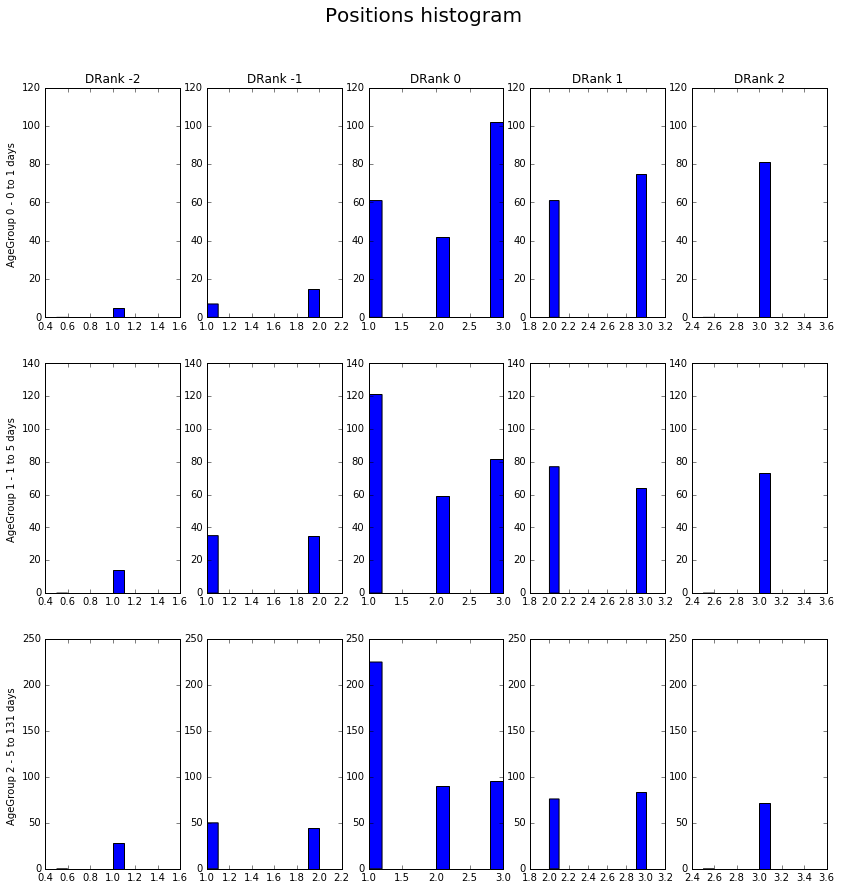

In [148]:
plt.figure(figsize=(14,14))
axref={}
nb_age_groups = 3
nb_ans = 3
nb_dranks = 2*(nb_ans-1)+1
groups = votes_complete[(votes_complete['Ans_count']==nb_ans)&(votes_complete['Age_group']<=nb_age_groups-1)]
groups = groups.sort_values(by=['Age_group']).groupby(['DRank','Age_group'])

for key,group in groups:
    drank = group['DRank'].iloc[0]
    age_group = group['Age_group'].iloc[0]
    position = nb_ans + drank
    if position==1:
        axref[age_group] = plt.subplot(nb_age_groups, nb_dranks,nb_dranks*age_group + position)
    plt.subplot(nb_age_groups, nb_dranks, nb_dranks*age_group + position,sharey=axref[age_group])
    plt.hist(group['AnsRank'].values)
    if age_group==0:
        plt.title('DRank %d'%(drank))
    if position==1:    
        plt.ylabel('AgeGroup %d - %s '%(age_group,rev_age_groups[age_group]))
        
plt.suptitle('Positions histogram',fontsize=20)
plt.show()

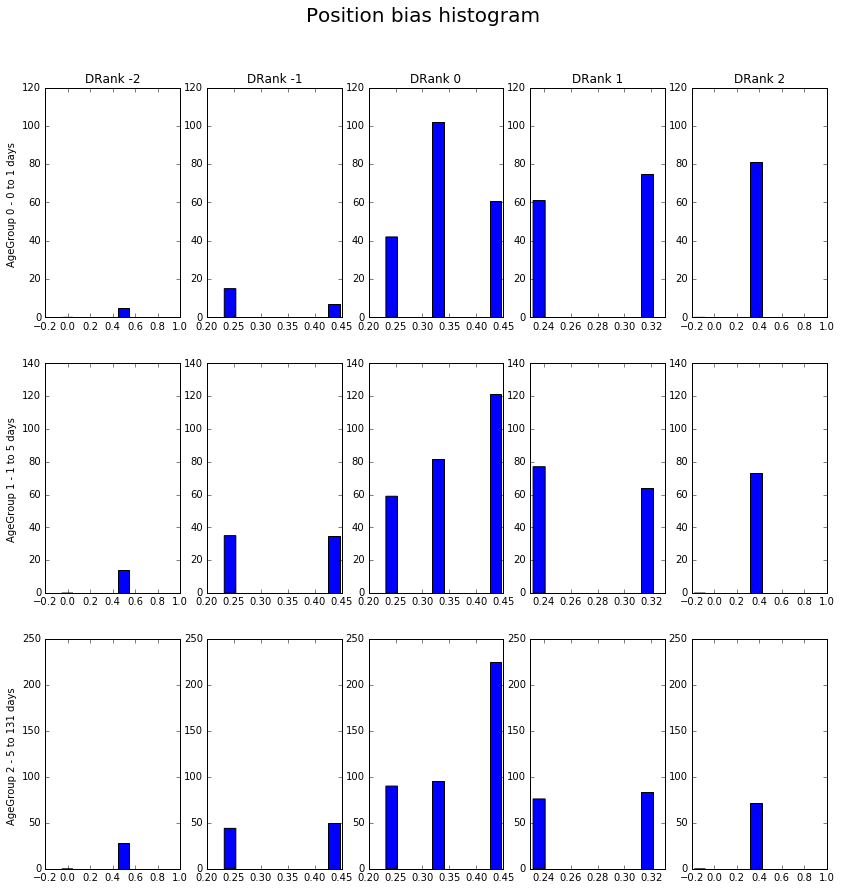

In [150]:
plt.figure(figsize=(14,14))
axref={}
nb_age_groups = 3
nb_ans = 3
nb_dranks = 2*(nb_ans-1)+1
groups = votes_complete[(votes_complete['Ans_count']==nb_ans)&(votes_complete['Age_group']<=nb_age_groups-1)]
groups = groups.sort_values(by=['Age_group']).groupby(['DRank','Age_group'])

for key,group in groups:
    drank = group['DRank'].iloc[0]
    age_group = group['Age_group'].iloc[0]
    position = nb_ans + drank
    if position==1:
        axref[age_group] = plt.subplot(nb_age_groups, nb_dranks,nb_dranks*age_group + position)
    plt.subplot(nb_age_groups, nb_dranks, nb_dranks*age_group + position,sharey=axref[age_group])
    plt.hist(group['EPbias'].values)
    if age_group==0:
        plt.title('DRank %d'%(drank))
    if position==1:    
        plt.ylabel('AgeGroup %d - %s '%(age_group,rev_age_groups[age_group]))
        
plt.suptitle('Position bias histogram',fontsize=20)
plt.show()

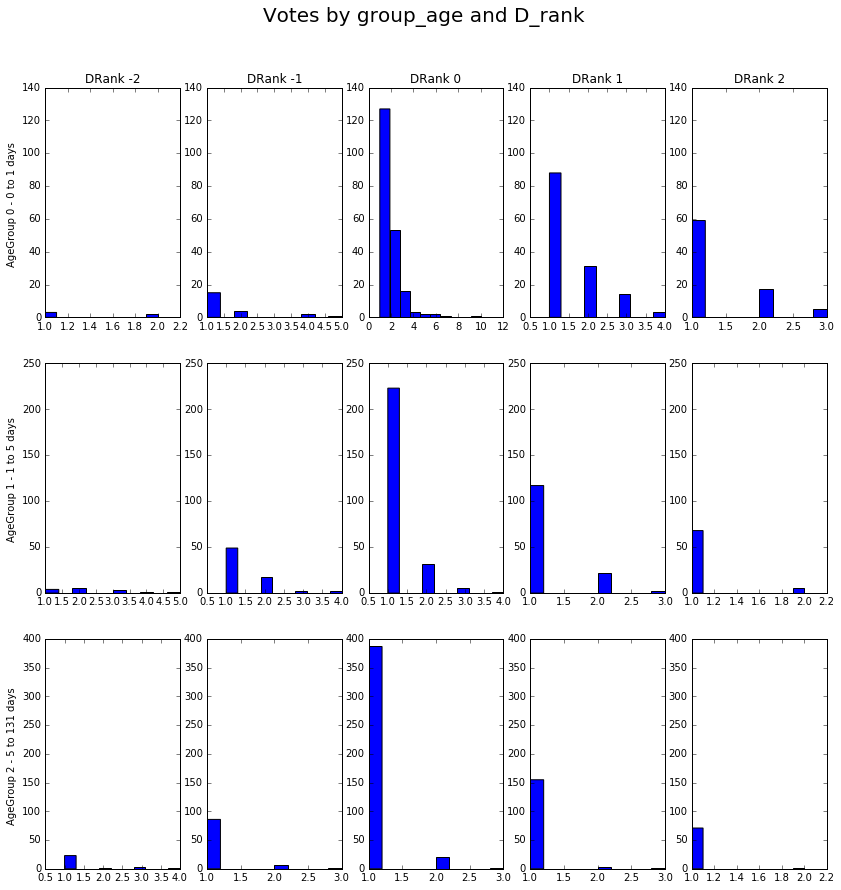

In [151]:
plt.figure(figsize=(14,14))
axref={}
nb_age_groups = 3
nb_ans = 3
nb_dranks = 2*(nb_ans-1)+1
groups = votes_complete[(votes_complete['Ans_count']==nb_ans)&(votes_complete['Age_group']<=nb_age_groups-1)]
groups = groups.sort_values(by=['Age_group']).groupby(['DRank','Age_group'])

for key,group in groups:
    drank = group['DRank'].iloc[0]
    age_group = group['Age_group'].iloc[0]
    position = nb_ans + drank
    if position==1:
        axref[age_group] = plt.subplot(nb_age_groups, nb_dranks,nb_dranks*age_group + position)
    plt.subplot(nb_age_groups, nb_dranks, nb_dranks*age_group + position,sharey=axref[age_group])
    plt.hist(group['Votes'].values)
    if age_group==0:
        plt.title('DRank %d'%(drank))
    if position==1:    
        plt.ylabel('AgeGroup %d - %s '%(age_group,rev_age_groups[age_group]))
        
plt.suptitle('Votes by group_age and D_rank',fontsize=20)
plt.show()

In [9]:
ff1 = lambda df: pd.DataFrame(dict(zip(['mean','var','count'],[[e] for e in np.around([df['Votes'].mean(),df['Votes'].var(),df['Votes'].count()],decimals=3)])))
mean_var_v = votes_complete.groupby(['Ans_count','AnsRank']).apply(ff1).reset_index(level=[0,1,2],drop=False)
mean_var_v.head()

,Ans_count,AnsRank,level_2,count,mean,var
0,1,1,0,4819,1.911,2.063
1,2,1,0,2154,1.332,0.643
2,2,2,0,2465,1.325,0.550
3,3,1,0,1005,1.224,0.459
4,3,2,0,725,1.178,0.224


In [10]:
mean_var_v[['count','mean','var']].describe()

,count,mean,var
count,179.000000,179.000000,149.000000
mean,84.687151,1.235620,0.297114
std,260.448581,0.641556,1.095704
min,1.000000,1.000000,0.000000
25%,2.000000,1.000000,0.000000
50%,7.000000,1.026000,0.067000
75%,42.000000,1.200000,0.221000
max,2821.000000,7.000000,12.500000


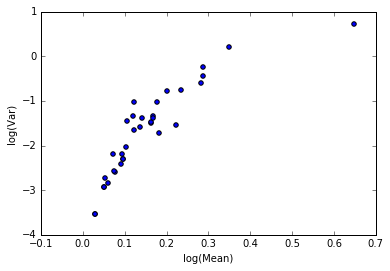

In [156]:
plt.scatter(x = np.log(mean_var_v[mean_var_v['count']>=7]['mean']), y = np.log(mean_var_v[mean_var_v['count']>=7]['var']))

#plt.legend(loc='lower right')
plt.xlabel('log(Mean)')
plt.ylabel('log(Var)')
plt.savefig('MeanVar_votes.pdf',format='pdf')

# The outlier

In [132]:
mean_var_v[np.log(mean_var_v['var'])>0.5]

,Ans_count,AnsRank,level_2,count,mean,var
0,1,1,0,4819,1.911,2.063


# Votes/day on a given answer . (Context information: question, ans aggregates)

# Does user quality estimation boost/reduce votes with respect to quality?

# Do users correct for position bias?

                               0         1         2         3         4
C(AnsRank, Sum)[mean]  -0.230776 -0.799213 -1.955753 -3.797860 -3.797860
C(AnsRank, Sum)[S.1.0]  0.164587  0.000000 -0.156278 -0.393910 -0.393910
C(AnsRank, Sum)[S.2.0]  0.000000  0.000000  0.000000  0.241719  0.241719
C(AnsRank, Sum)[S.3.0]  0.000000  0.000000  0.141840  0.325431  0.325431
C(AnsRank, Sum)[S.4.0]  0.000000  0.000000  0.000000  0.000000  0.000000
ReScore                -0.586199 -0.987113 -1.704387 -2.936222 -2.936222
EPbias                  0.846111  1.466839  3.287317  6.825569  6.825569


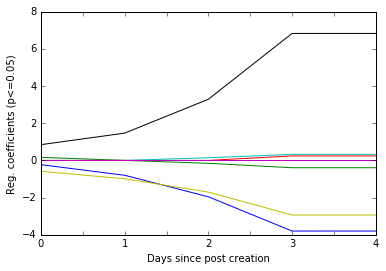

In [155]:

nb_ans = 5
#+ C(AnsRank,Sum(omit=3)) + C(Rep_group,Sum(omit=0))
# 
# + Ans_count + Comments + VotRcvAns + VotRcvQ
fml = 'Votes ~ ReScore + EPbias + C(AnsRank,Sum) - 1'
mat_1 = []
dev_1 = []
mat_ps_1 = []
acounts = [0,1,2,3,4]
CN = []
r_method = sm.families.NegativeBinomial(link=sm.families.links.log)#sm.families.Poisson(link=sm.families.links.log)
for age in acounts:
    datas = votes_r[(votes_r.Ans_count > 1)&(votes_r.Ans_count<=nb_ans) & (votes_r.Age_group <= age)]
    mod = smf.glm(fml, data=datas,
                  family=r_method, offset=np.log(datas['Age_vot'] + 1))
    rslt = mod.fit(method='bfgs')
    mat_1.append(rslt.params[rslt.pvalues<=0.05].reindex(rslt.params.index).fillna(0))
    dev_1.append(rslt.deviance)
    mat_ps_1.append(rslt.pvalues)
    #print rslt.summary()
mat_1 = pd.DataFrame(mat_1, index=[str(x) for x in acounts])
mat_ps_1 = pd.DataFrame(mat_ps_1, index=[str(x) for x in acounts])
print mat_1.T

mat_1.plot(legend=False)
mat_1.plot()
#mat_1.plot()
plt.xlabel("Days since post creation")
plt.ylabel("Reg. coefficients (p<=0.05)")
#plt.savefig('CAnsRank.pdf',format='pdf')



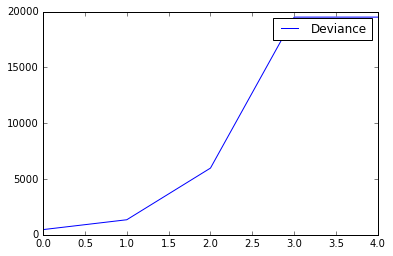

In [138]:
plt.plot(acounts,dev_1,label='Deviance')
plt.legend(loc='upper right')
plt.show()

                                               0         1         2  \
C(DRank, Treatment(reference=2))[-2.0] -0.795497 -1.216857 -2.534399   
C(DRank, Treatment(reference=2))[-1.0] -0.350870 -1.083451 -2.058247   
C(DRank, Treatment(reference=2))[0.0]  -0.370929 -0.897179 -1.690905   
C(DRank, Treatment(reference=2))[1.0]  -0.339720 -0.748642 -1.266092   
C(DRank, Treatment(reference=2))[2.0]  -0.379933 -0.675993 -1.019738   
ReScore                                -0.549923 -1.074718 -1.934838   
EPbias                                  1.284285  1.765820  2.743643   

                                               3         4  
C(DRank, Treatment(reference=2))[-2.0] -4.879481 -4.879481  
C(DRank, Treatment(reference=2))[-1.0] -3.741693 -3.741693  
C(DRank, Treatment(reference=2))[0.0]  -3.298650 -3.298650  
C(DRank, Treatment(reference=2))[1.0]  -2.389846 -2.389846  
C(DRank, Treatment(reference=2))[2.0]  -1.891278 -1.891278  
ReScore                                -3.286611 -3.28661

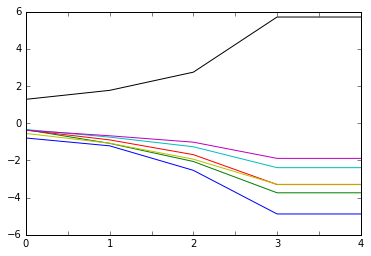

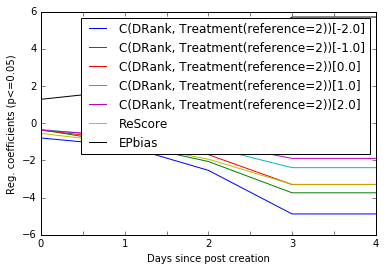

In [12]:
votes_r = votes_complete

nb_ans = 3
fml = 'Votes ~ ReScore+EPbias + C(DRank,Treatment(reference=%d)) - 1 '%(nb_ans-1)
#fml = 'np.log(Votes+1) ~ C(DRank,Sum(omit=%d)) - 1 '%(0)
mat_2 = []
dev = []
mat_ps = []
acounts = [0,1,2,3,4]
r_method = sm.families.NegativeBinomial(link=sm.families.links.log)#sm.families.Poisson(link=sm.families.links.log)
for age in acounts:
    datas = votes_r[(votes_r.Ans_count > 1) & (votes_r.Ans_count<=nb_ans) & (votes_r.Age_group <= age)]
    mod = smf.glm(fml, data=datas,
                  family=r_method, offset=np.log(datas['Age_vot'] + 1))
    rslt = mod.fit(method='bfgs')
    mat_2.append(rslt.params[rslt.pvalues<=0.05].reindex(rslt.params.index).fillna(0))
    dev.append(rslt.deviance)
    mat_ps.append(rslt.pvalues)
mat_2 = pd.DataFrame(mat_2, index=[str(x) for x in acounts])
mat_ps = pd.DataFrame(mat_ps, index=[str(x) for x in acounts])
print mat_2.T
mat_2.plot(legend=False)
mat_2.plot()
plt.xlabel("Days since post creation")
plt.ylabel("Reg. coefficients (p<=0.05)")
#plt.savefig('CDRankVignette.pdf',format='pdf')
#Mean effect of positive levels (under estimation) have the highest mean effects 
#(either with dummy or Sum deviation coding)

                        0             1             2             3  \
C(Rep_group)[0]  0.135542  1.469307e-10  1.310413e-20  3.368009e-21   
C(Rep_group)[1]  0.019420  5.315998e-08  4.325308e-17  1.139090e-10   
C(Rep_group)[2]  0.101878  3.847232e-08  5.014268e-14  7.147285e-19   
C(Rep_group)[3]  0.023391  1.485266e-07  4.784383e-12  9.558159e-24   
ReScore          0.000001  9.084499e-15  4.814479e-10  2.389031e-13   
Pbias            0.001443  2.132869e-02  5.407792e-01  6.637984e-01   
CumScore         0.000881  6.674776e-02  4.240161e-04  1.125778e-15   

                            4  
C(Rep_group)[0]  3.368009e-21  
C(Rep_group)[1]  1.139090e-10  
C(Rep_group)[2]  7.147285e-19  
C(Rep_group)[3]  9.558159e-24  
ReScore          2.389031e-13  
Pbias            6.637984e-01  
CumScore         1.125778e-15  


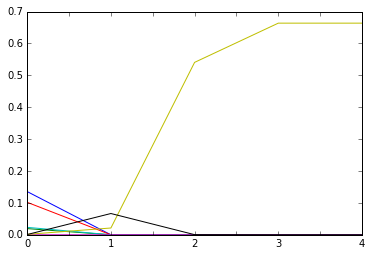

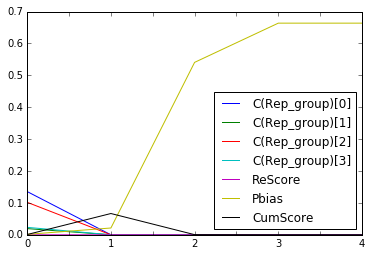

In [162]:
print mat_ps.T
mat_ps.plot(legend=False)
mat_ps.plot()

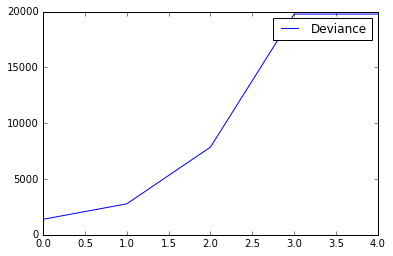

In [94]:
plt.plot(acounts,dev,label='Deviance')
plt.legend(loc='upper right')
plt.show()

# Group Ranks

In [173]:
levels = [e+1 for e in range(4)]
contrast = KRanksG().code_with_intercept(levels)
print contrast.matrix

[[ 1.  3.  0.  0.]
 [ 1. -1.  2.  0.]
 [ 1. -1. -1.  1.]
 [ 1. -1. -1. -1.]]


In [15]:
#Comments Ans_count AnsWordCount DRank Age_vot 
mod_ols = smf.ols(formula='np.log(Votes+1) ~ ReScore + Score + Pbias + C(AnsRank,KRanksG) -1', data= votes_r[votes_r.Ans_count<=4])
res = mod_ols.fit()
print res.summary()
##EPbias collinear with C(AnsRank,KRanks)

                            OLS Regression Results                            
Dep. Variable:      np.log(Votes + 1)   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                 1.080e+04
Date:                Mon, 04 Apr 2016   Prob (F-statistic):               0.00
Time:                        03:57:34   Log-Likelihood:                 6125.1
No. Observations:               11573   AIC:                        -1.224e+04
Df Residuals:                   11566   BIC:                        -1.218e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
C(An

## Kranks (NB: mean of contrast is relative to mean of individual effect of top answer)

In [12]:
#Comments Ans_count AnsWordCount DRank Age_vot 
mod_ols = smf.ols(formula='np.log(Votes+1) ~ ReScore + Score + EPbias + C(AnsRank,KRanks(1)) -1', data= votes_r[votes_r.Ans_count<=4])
res = mod_ols.fit()
print res.summary()
##EPbias collinear with C(AnsRank,KRanks)

                            OLS Regression Results                            
Dep. Variable:      np.log(Votes + 1)   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                 1.088e+04
Date:                Sun, 03 Apr 2016   Prob (F-statistic):               0.00
Time:                        02:50:46   Log-Likelihood:                 6162.6
No. Observations:               11573   AIC:                        -1.231e+04
Df Residuals:                   11566   BIC:                        -1.226e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------
C(AnsRank, KRanks(

In [86]:
# Removes contrast tag against level to compare to (omit_i)
fml = 'np.log(Votes+1) ~ ReScore + EPbias + Score +  C(AnsRank,KRanks(1)) -1'
mat = []
mses = []
r2s = []
alphas = np.arange(0, 0.07, 0.01)
for alpha in alphas:
    mod = sm.OLS.from_formula(fml, votes_r[votes_r.Ans_count<=4])
    rslt = mod.fit_regularized(alpha=alpha)
    mat.append(rslt.params)
    mses.append(rslt.mse_resid)
    r2s.append(rslt.rsquared)
mat = pd.DataFrame(mat[::-1], index=[str(x) for x in np.around(-np.log(alphas + 0.01),decimals=3)[::-1]])
print mat.T

                                2.526     2.659     2.813     2.996     3.219  \
C(AnsRank, KRanks(1))[mean]  0.000000  0.000000  0.000000  0.000000  0.000000   
C(AnsRank, KRanks(1))[S.2]   0.000000  0.000000  0.000000  0.000000  0.031282   
C(AnsRank, KRanks(1))[S.3]   0.000000  0.000000  0.000000  0.000000  0.000000   
C(AnsRank, KRanks(1))[S.4]   0.000000  0.000000  0.000000  0.000000  0.000000   
ReScore                      0.034259  0.073109  0.111959  0.150808  0.172518   
EPbias                       0.369929  0.379168  0.388407  0.397646  0.443181   
Score                        0.302274  0.291494  0.280713  0.269932  0.260467   

                                3.507     3.912     4.605  
C(AnsRank, KRanks(1))[mean]  0.000000 -0.264903 -3.060290  
C(AnsRank, KRanks(1))[S.2]   0.063715  0.176830  0.762379  
C(AnsRank, KRanks(1))[S.3]   0.000000  0.070336  0.760198  
C(AnsRank, KRanks(1))[S.4]   0.000000  0.000000  0.761587  
ReScore                      0.193598  0.144608 -0.

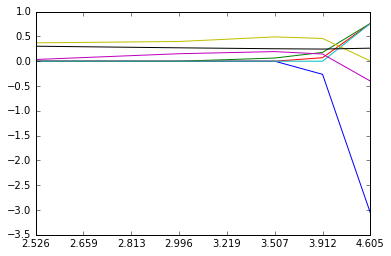

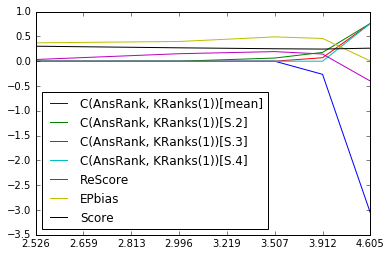

In [87]:
# Coefficients are small because these are relative increase/decrease
# After first setp of regularization(0.015) there's evidence for the model: (e.g. 2 optimizes w/r to 3)
# ReScore+EPbias+Score (all pos) + C(AnsRank,KRanks(2))[s.2,3,4] (neg e.g. pos 2 contributes positively w/r to 3)
#
#Interestingly, lower positions contribute positively compared to top position (rel to individual eff of first).
#Does this mean they compensate for Pbias,Score ? Also, note that C(AnsRank,KRanks(2))[s.2] has max value among contrasts (joint information with top pos)
#
# Note that C(AnsRank,KRanks(2))[s.2] and C(AnsRank,KRanks(2))[mean] die after (0.015)
# At 0.0 coeffs are really inflated (interpretation between -1,1 is not useless for Score,ReScore and EPbias at that point). Indeed, regularization is necessary
mat.plot(legend=False)
mat.plot()

## How does question quality relate to answer quality

                0         1         2         3
ReScore  0.660508  0.219504  0.284264  0.340334
EPbias   0.690765  1.371342  1.369560  1.448960


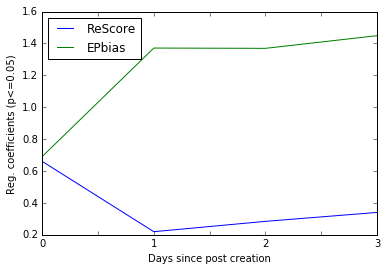

In [143]:
#Comments Ans_count AnsWordCount DRank Age_vot

nb_ans = 5

mat_q = []
rsq = []
mat_ps_q = []
acounts = [0,1,2,3]

for age in acounts:
    datas = votes_r[(votes_r.Ans_count > 1) & (votes_r.Ans_count<=nb_ans) & (votes_r.Age_group == age)]
    mod = smf.ols(formula='QReScore ~ ReScore + EPbias - 1 ', data=datas)
    rslt = mod.fit()
    mat_q.append(rslt.params[rslt.pvalues<=0.05].reindex(rslt.params.index).fillna(0))
    rsq.append(rslt.rsquared_adj)
    mat_ps_q.append(rslt.pvalues)
mat_q = pd.DataFrame(mat_q, index=[str(x) for x in acounts])
mat_ps_q = pd.DataFrame(mat_ps_q, index=[str(x) for x in acounts])
print mat_q.T

mat_q.plot()
plt.xlabel("Days since post creation")
plt.ylabel("Reg. coefficients (p<=0.05)")
plt.savefig('QReScore.pdf',format='pdf')


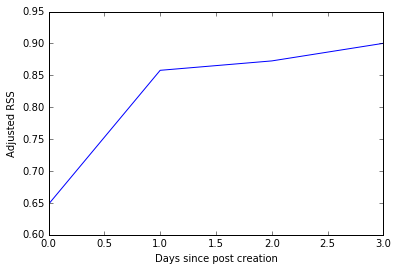

In [140]:
plt.plot(acounts,rsq)
plt.legend(loc='lower right')
plt.xlabel('Days since post creation')
plt.ylabel('Adjusted RSS')
plt.savefig('RSSQReScore.pdf',format='pdf')
plt.show()

In [106]:
mod_poi = smf.glm('QReScore ~ ReScore + EPbias - 1 ', data=votes[votes['Ans_count']==4],
                  family=sm.families.Poisson(link=sm.families.links.log)).fit(method='bfgs') #
#print mod_poi.mle_retvals['converged']
print mod_poi.summary()

                 Generalized Linear Model Regression Results                  
Dep. Variable:               QReScore   No. Observations:                 2172
Model:                            GLM   Df Residuals:                     2170
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -2016.8
Date:                Sat, 02 Apr 2016   Deviance:                       168.97
Time:                        14:28:45   Pearson chi2:                     143.
No. Iterations:                     7                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
ReScore        0.0081      0.067      0.121      0.904        -0.123     0.139
EPbias        -0.7037      0.172     -4.091      0.0

In [6]:
from patsy.contrasts import ContrastMatrix

def _name_levels(prefix, levels):
    return ["[%s%s]" % (prefix, level) for level in levels]

class KRanksG(object):
    """K-rank contrasts.
       Compare relative effect on output variable for a given level
       against all those below.
       
       # Reduced rank
       dmatrix("C(a, KRanks)", balanced(a=4))
       # Full rank
       dmatrix("0 + C(a, KRanks)", balanced(a=4))
    """
    def _kranksg_contrast(self, levels):
        n = len(levels)
        contr = np.zeros((n, n - 1))
        contr[:-1][np.diag_indices(n - 1)] = np.arange(1, n)[::-1]
        rows,cols = np.tril_indices(n-1)
        contr[(rows+1,cols)] = -1
        return contr

    def code_with_intercept(self, levels):
        contrast = np.column_stack((np.ones(len(levels)),
                                    self._kranksg_contrast(levels)))
        column_suffixes = _name_levels("K-r.", ["intercept"] + list(levels[1:]))
        return ContrastMatrix(contrast, column_suffixes)

    def code_without_intercept(self, levels):
        contrast = self._kranksg_contrast(levels)
        return ContrastMatrix(contrast, _name_levels("K-r.", levels[1:]))
                              

In [7]:
from patsy.contrasts import ContrastMatrix
class KRanks(object):
    """
       # Reduced rank
       dmatrix("C(a, TwoRanks)", balanced(a=4))
       # Full rank
       dmatrix("0 + C(a, TwoRanks)", balanced(a=4))
       # Omit a different level
       dmatrix("C(a, TwoRanks(1))", balanced(a=3))
       dmatrix("C(a, TwoRanks('a1'))", balanced(a=3))
    """
    #We assume levels are all different
    def _get_level(self,levels,omit):
        return levels.index(omit)
    
    def __init__(self, omit=None):
        self.omit = omit

    def _omit_i(self, levels):
        if self.omit is None:
            # We assume below that this is positive
            return len(levels) - 1
        else:
            return self._get_level(levels, self.omit)

    def _kranks_contrast(self, levels):
        n = len(levels)
        omit_i = self._omit_i(levels)
        #self._omit_i(levels)
        eye = np.eye(n - 1)
        out = np.empty((n, n - 1))
        out[:omit_i, :] = eye[:omit_i, :]
        out[omit_i, :] = -1
        out[omit_i + 1:, :] = eye[omit_i:, :]
        return out

    def code_with_intercept(self, levels):
        contrast = self.code_without_intercept(levels)
        n_zeros = np.zeros(len(levels))
        np.put(n_zeros,0,[-1])
        matrix = np.column_stack((n_zeros,
                                  contrast.matrix))
        column_suffixes = ["[mean]"] + contrast.column_suffixes
        return ContrastMatrix(matrix, column_suffixes)

    def code_without_intercept(self, levels):
        matrix = self._kranks_contrast(levels)
        omit_i = self._omit_i(levels)
        included_levels = levels[:omit_i] + levels[omit_i + 1:]
        return ContrastMatrix(matrix, _name_levels("S.", included_levels))


In [43]:
from patsy.contrasts import *
Treatment??